<a href="https://colab.research.google.com/github/Sayari404/CODSOFT/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/Churn_Modelling.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv(dataset_path)

In [ ]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
# Summary statistics
print(data.describe())

        CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.746300      0.545700     38.921800      5.012800   
std       96.653299      0.827529      0.497932     10.487806      2.892174   
min      350.000000      0.000000      0.000000     18.000000      0.000000   
25%      584.000000      0.000000      0.000000     32.000000      3.000000   
50%      652.000000      0.000000      1.000000     37.000000      5.000000   
75%      718.000000      1.000000      1.000000     44.000000      7.000000   
max      850.000000      2.000000      1.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.00

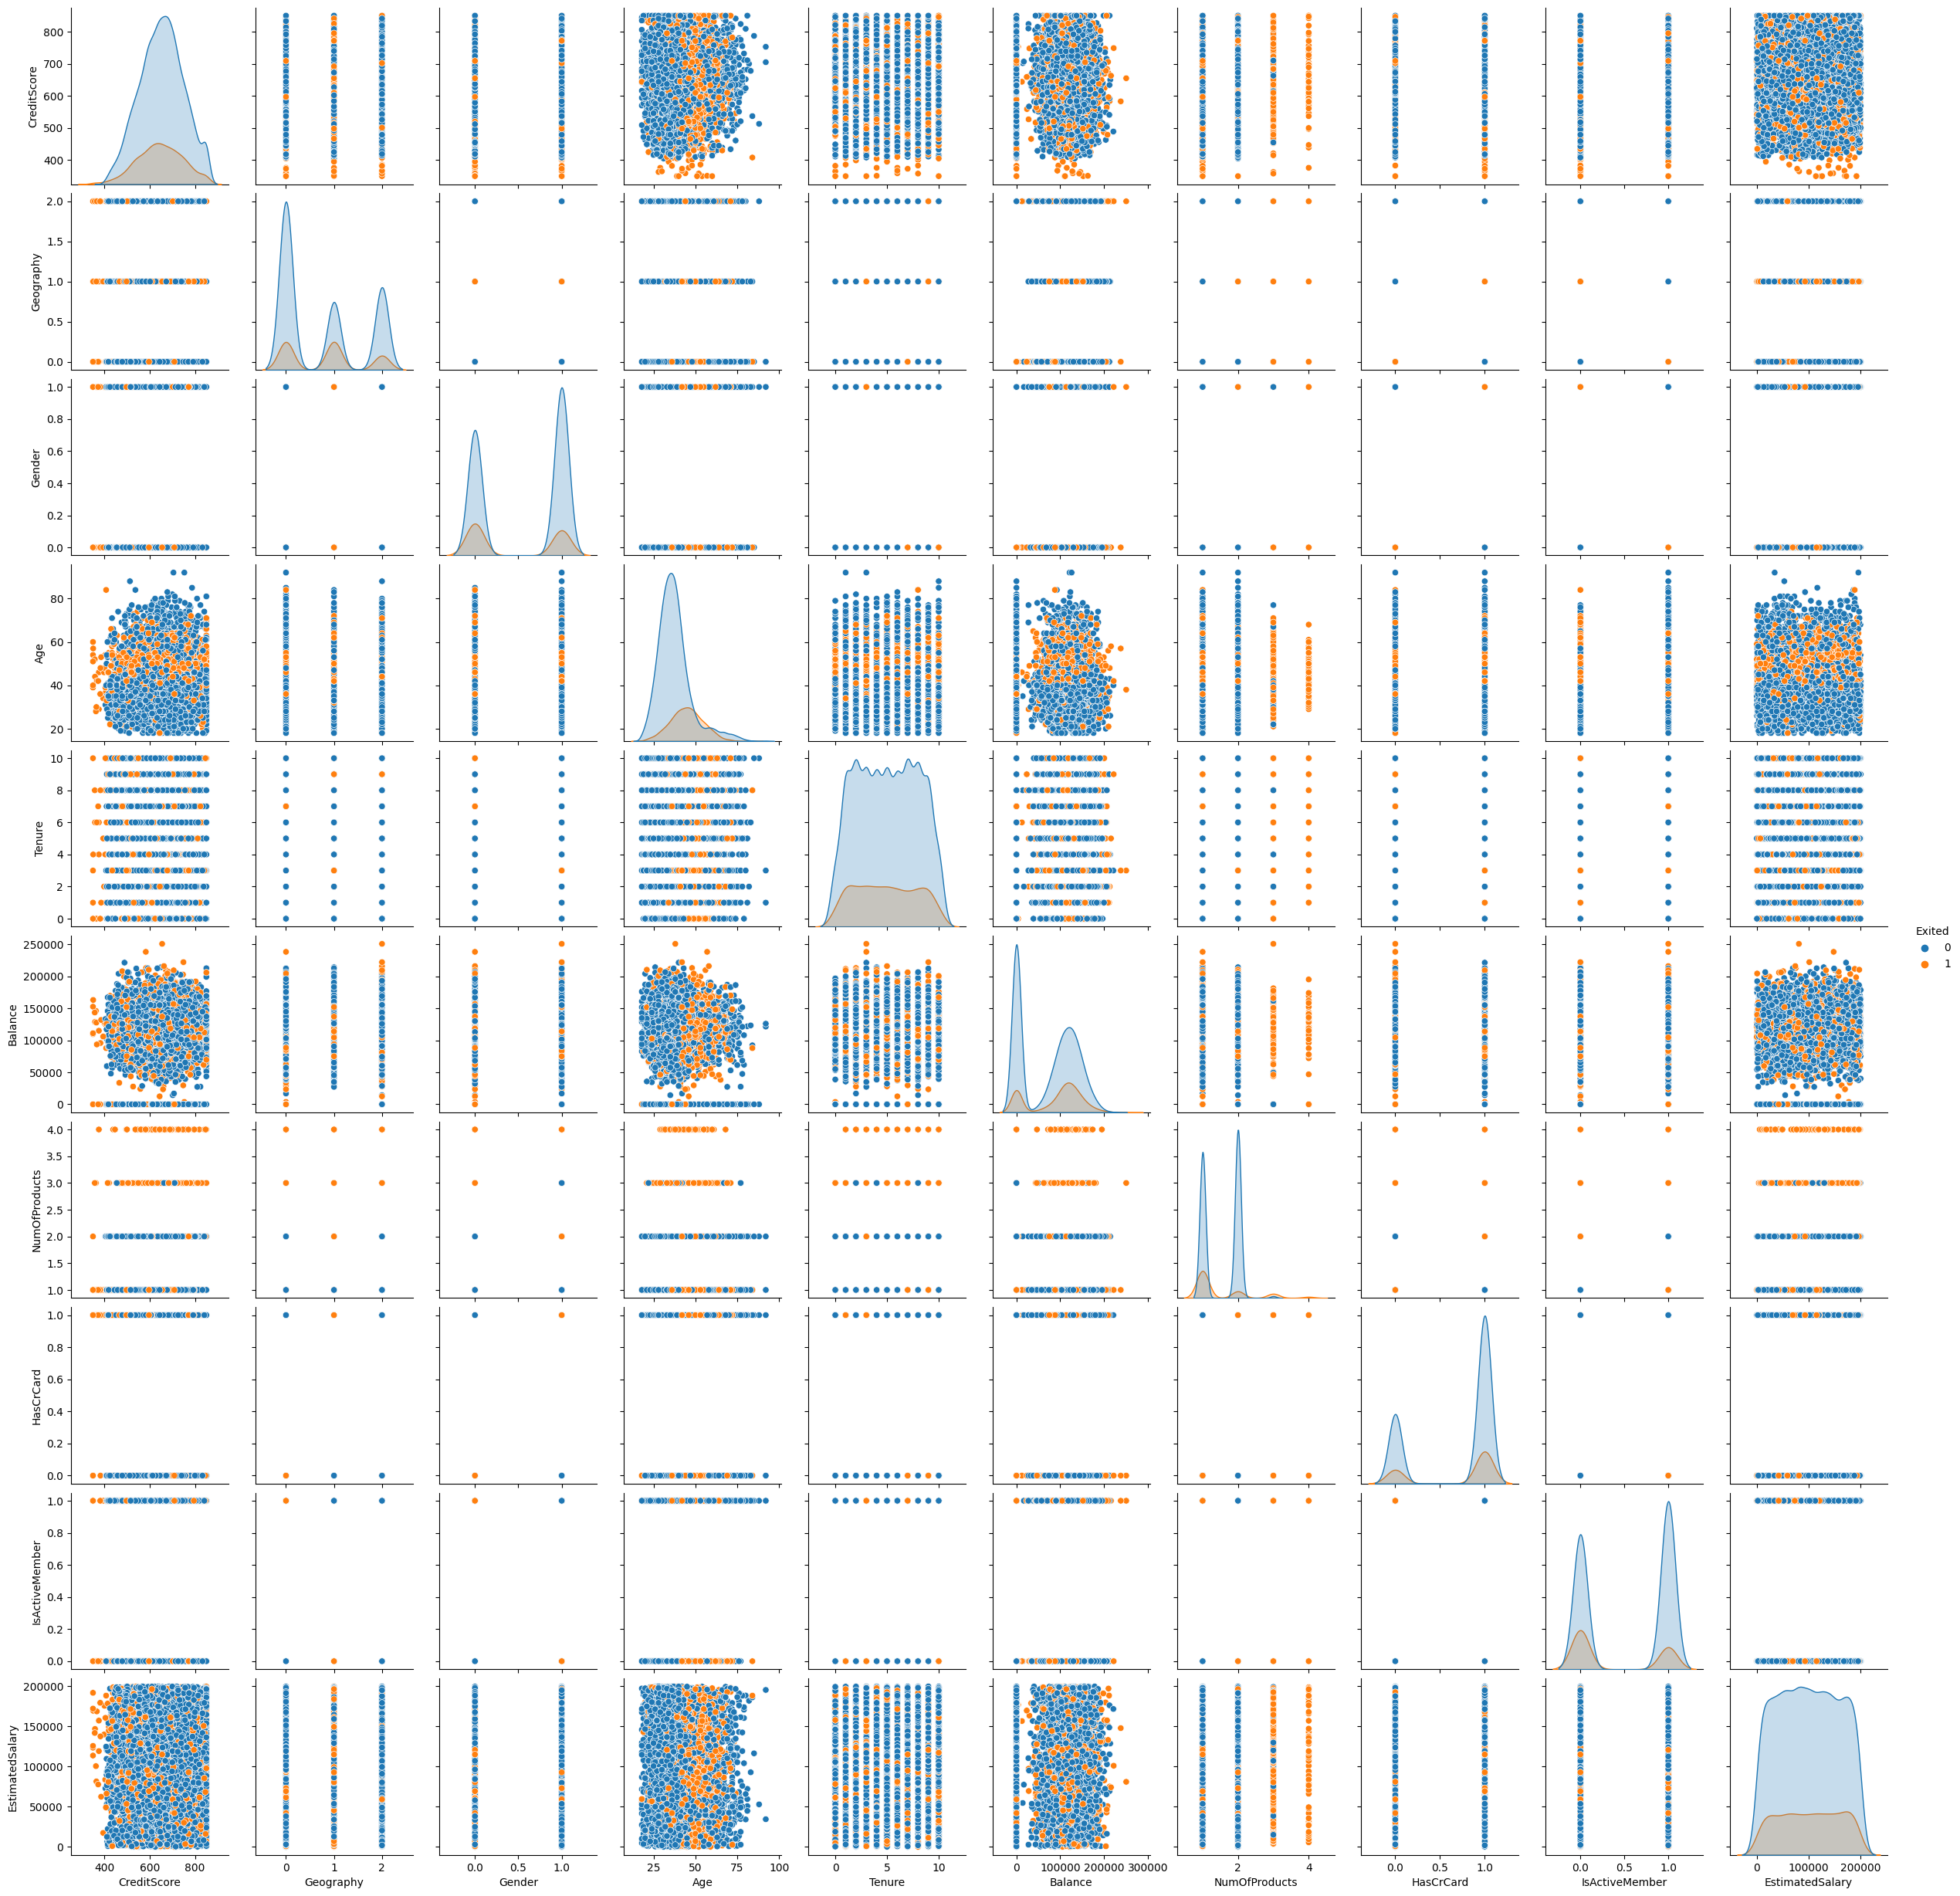

In [ ]:
# Pairplotting for numerical variables
sns.pairplot(data, hue='Exited')  # 'Exited' is the target variable
plt.show()


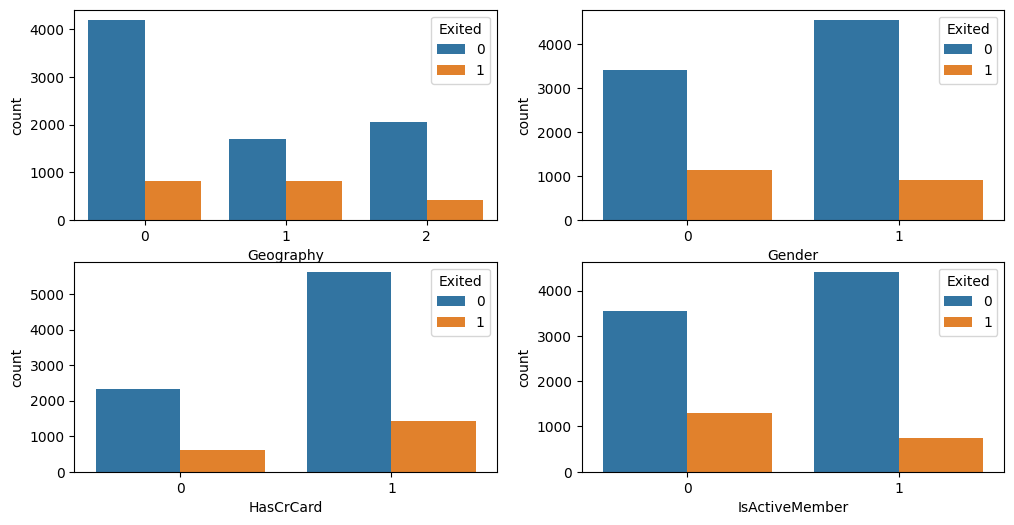

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Geography', data=data, hue='Exited')

plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=data, hue='Exited')

plt.subplot(2, 2, 3)
sns.countplot(x='HasCrCard', data=data, hue='Exited')

plt.subplot(2, 2, 4)
sns.countplot(x='IsActiveMember', data=data, hue='Exited')

plt.show()

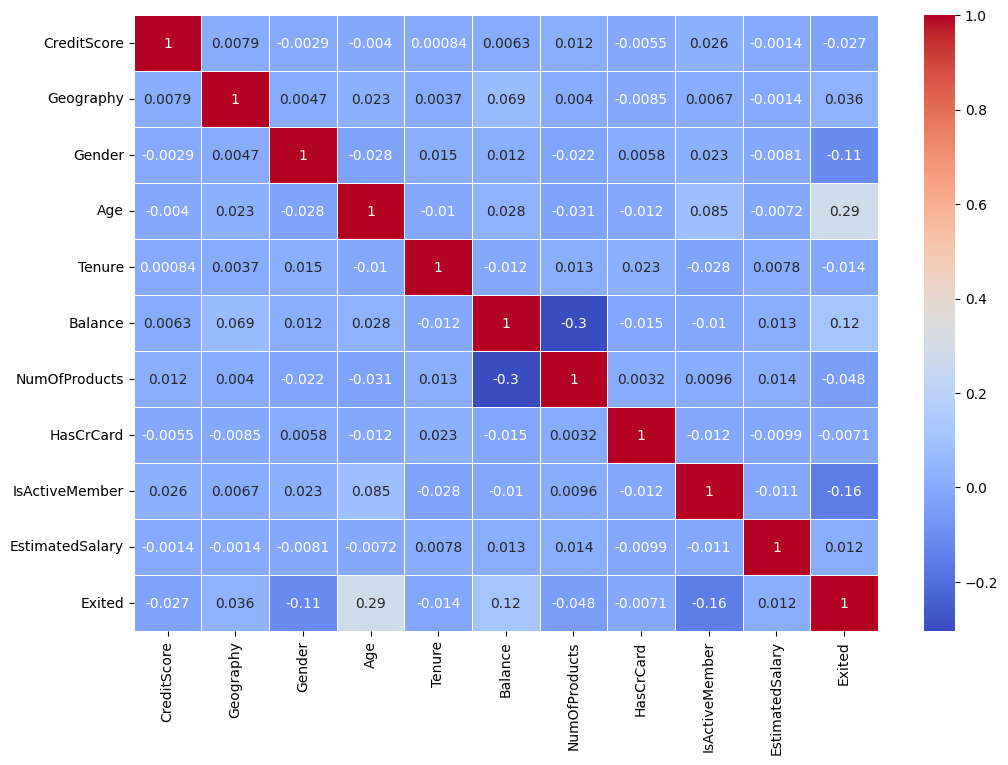

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

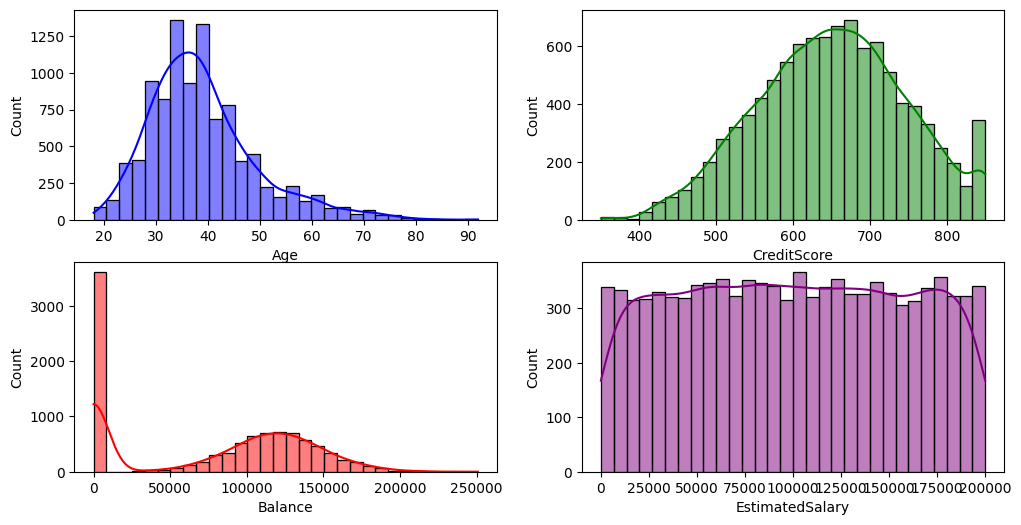

In [ ]:
# Distribution of numerical variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color='blue')

plt.subplot(2, 2, 2)
sns.histplot(data['CreditScore'], bins=30, kde=True, color='green')

plt.subplot(2, 2, 3)
sns.histplot(data['Balance'], bins=30, kde=True, color='red')

plt.subplot(2, 2, 4)
sns.histplot(data['EstimatedSalary'], bins=30, kde=True, color='purple')

plt.show()

In [ ]:
# Step 2: Data Preprocessing
# Dropping unnecessary columns
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
# Encoding categorical variables (Geography and Gender) using Label Encoding
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
# Splitting data into features (X) and target variable (y)
X = data.drop(columns=['Exited'])  # 'Exited' is the target variable
y = data['Exited']


In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizing or standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Checking the shape of data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 10)
X_test shape: (2000, 10)
y_train shape: (8000,)
y_test shape: (2000,)


In [ ]:
#We drop the unnecessary columns 'RowNumber', 'CustomerId', and 'Surname' since they are unlikely to be useful for predicting churn.
#We encode the categorical variables 'Geography' and 'Gender' using label encoding, which assigns numerical values to each category.
#The target variable 'Exited' is used as the churn indicator.
#The rest of the code, including splitting the data and standardizing numerical features, remains the same.

In [ ]:
import pandas as pd
import numpy as np

# Feature engineering

# 1. Creating a new feature 'TenureInMonths' by multiplying 'Tenure' with 12 (assuming Tenure is in years)
data['TenureInMonths'] = data['Tenure'] * 12

# 2. Creating a binary feature 'HighBalance' indicating if 'Balance' is greater than a certain threshold
balance_threshold = 50000  # Adjust the threshold as needed
data['HighBalance'] = np.where(data['Balance'] > balance_threshold, 1, 0)

# 3. Combining 'NumOfProducts' and 'HasCrCard' into a new feature 'ProductsPerCard'
data['ProductsPerCard'] = data['NumOfProducts'] / (data['HasCrCard'] + 1)

# 4. Creating age groups based on 'Age'
age_bins = [18, 25, 35, 45, 55, 65, np.inf]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)


# Checking the resulting dataset
print(data.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  TenureInMonths  HighBalance  \
0               1        101348.88       1              24            0   
1               1        112542.58       0              12            1   
2               0        113931.57       1              96            1   
3               0         93826.63       0              12            0   
4               1         79084.10       0              24            1   

   ProductsPerCard AgeGroup  Geography_1  Geography_2  Gender_1  
0              0.5    35-44            0            0         0  
1       

In [ ]:
#I create a new feature 'TenureInMonths' by converting 'Tenure' from years to months.
#I create a binary feature 'HighBalance' to indicate whether a customer's balance is above a certain threshold.
#I combine 'NumOfProducts' and 'HasCrCard' into 'ProductsPerCard' to represent the average number of products per cardholder.
#I create age groups based on 'Age' using the pd.cut function.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initializing models
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Training models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#  predictions
log_reg_preds = log_reg.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
gradient_boosting_preds = gradient_boosting.predict(X_test)

# Evaluation of models
print("Logistic Regression:")
print(classification_report(y_test, log_reg_preds))
print("Random Forest:")
print(classification_report(y_test, random_forest_preds))
print("Gradient Boosting:")
print(classification_report(y_test, gradient_boosting_preds))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       

In [ ]:
#Based on the classification reports , here are the accuracies for each of the three models:

#Logistic Regression: 0.81 (81%)
#Random Forest: 0.87 (87%)
#Gradient Boosting: 0.86 (86%)
#These accuracy scores indicate how well each model performs in correctly predicting the target variable (churn in this case).
#The Random Forest model has the highest accuracy, followed by Gradient Boosting, and then Logistic Regression.
#It's important to consider other evaluation metrics like precision, recall, and F1-score along with accuracy to get a comprehensive understanding of the model's performance,
#especially in imbalanced datasets where one class (e.g., churned customers) might be underrepresented.